# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A

Let $r$ be the randomly generated number between 0 and 1. If we want randomly generated numbers between $a$ and $b$, we need to linearly scale the function.

In [39]:
a=2; b=5

In [40]:
def ran_ab(a,b):
    return a+b*np.random.rand()

Lets make sure this works.

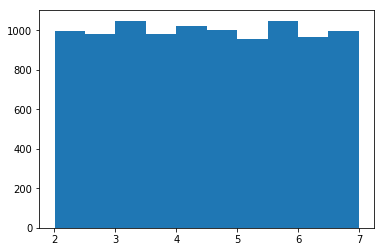

In [41]:
test_1 = np.array([ran_ab(a,b) for i in range(10000)])
_, x, y = plt.hist(test_1)
plt.show()

To get the function we want, we will use the inverse CDF method. Since the function is $2-2x$, the cumulative function is

$$\int_0^x 2-2x' dx' = 2x-x^2 $$